In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, average_precision_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats


In [26]:
# Load data
df = pd.read_csv('data_file.csv')


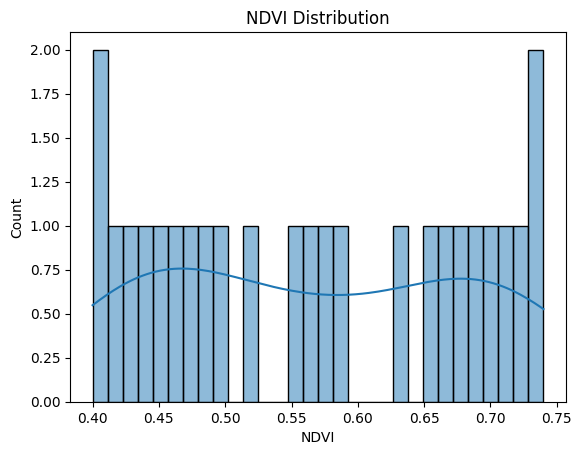

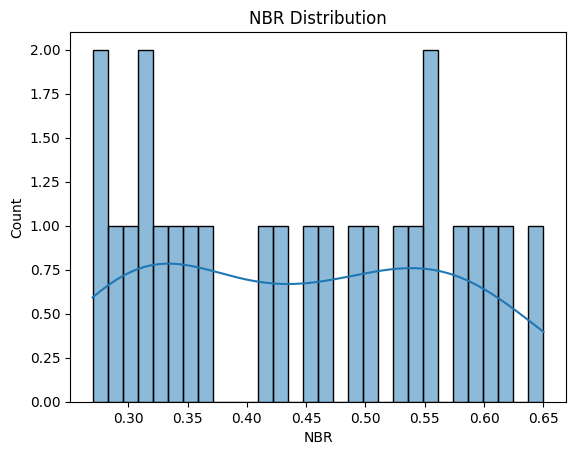

In [27]:
# Exploratory Data Analysis (EDA)
sns.histplot(df['NDVI'], kde=True, bins=30)
plt.title('NDVI Distribution')
plt.show()

sns.histplot(df['NBR'], kde=True, bins=30)
plt.title('NBR Distribution')
plt.show()


In [28]:
# Check class distribution
print("Class Distribution:", df['label'].value_counts())


Class Distribution: label
1    15
0    10
Name: count, dtype: int64


In [29]:
# Split data into training and test set
X = df[['NDVI', 'NBR']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
# Initialize and train the Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)


GaussianNB()

In [32]:
# Fine-tuning the model using Grid Search
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_gnb = grid_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.6

In [33]:
# Make predictions using the fine-tuned model
y_pred_best = best_gnb.predict(X_test_scaled)


In [34]:
# Evaluate the fine-tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
map_score_best = average_precision_score(y_test, y_pred_best, average='macro')

print(f"Accuracy (Fine-tuned): {accuracy_best:.4f}")
print(f"Precision (Fine-tuned): {precision_best:.4f}")
print(f"Recall (Fine-tuned): {recall_best:.4f}")
print(f"Mean Average Precision (Fine-tuned): {map_score_best:.4f}")

print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))


Accuracy (Fine-tuned): 1.0000
Precision (Fine-tuned): 1.0000
Recall (Fine-tuned): 1.0000
Mean Average Precision (Fine-tuned): 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         7

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[1 0]
 [0 7]]


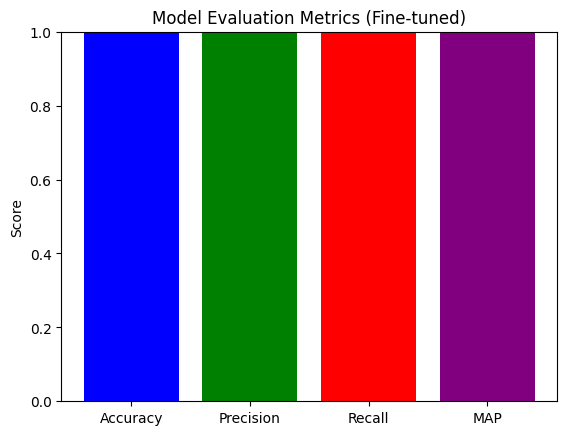

In [35]:
# Visualize the evaluation metrics for the fine-tuned model
metrics_best = ['Accuracy', 'Precision', 'Recall', 'MAP']
values_best = [accuracy_best, precision_best, recall_best, map_score_best]

plt.bar(metrics_best, values_best, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics (Fine-tuned)')
plt.ylim(0, 1)
plt.show()


In [37]:
# Cross-validation
scores = cross_val_score(gnb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [1.         1.         0.66666667 1.         1.        ]
Mean Accuracy: 0.9333333333333332


In [38]:
# Confidence Interval for Accuracy
confidence = 0.95
acc_std = scores.std()
acc_se = acc_std / np.sqrt(scores.shape[0])
acc_conf_interval = stats.t.interval(confidence, df=len(scores)-1, loc=scores.mean(), scale=acc_se)
print("Accuracy Confidence Interval:", acc_conf_interval)


Accuracy Confidence Interval: (0.767778133572831, 1.0988885330938354)


In [39]:
# Predict class probabilities
y_prob = loaded_gnb.predict_proba(X_test_scaled)
print("Class Probabilities:", y_prob[:5])


Class Probabilities: [[2.08977498e-37 1.00000000e+00]
 [2.09308266e-15 1.00000000e+00]
 [4.17171847e-05 9.99958283e-01]
 [2.51698081e-30 1.00000000e+00]
 [4.07623590e-28 1.00000000e+00]]
